In [1]:
## Python 3.8.3 ##

## All imports ##

#General
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#Read in and view FITS file
import os
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS #World Coordinate System
import matplotlib.gridspec as gridspec #Grid layout to place subplots within a figure

#Canny edge detection
from skimage.feature import canny

#Linear Hough Transform
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import line
from skimage import data

#Animation/GIF
from matplotlib import animation

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

#Circular Hough Transform
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

#Probabilistic Hough Transform
from skimage.transform import probabilistic_hough_line

#For Gaussian fit
from astropy.modeling import models
from specutils.fitting import fit_lines

In [2]:
## Reading in + viewing the .fits file ##

# file = 'OPH_CORE_20160115_00084_850_EA3_cal.FITS'

file = 'OPH_CORE_850_EA3_cal_smooth_coadd.FITS'

hdulist = fits.open(file) #List of Header Data Units


hdu = hdulist[0]
image = hdulist['PRIMARY',1].data[0]
image1 = np.copy(image) #Creating a separate 'image' variable to overlay in a plot later
wcs = WCS(hdulist[0].header).celestial #World Coordinate System info

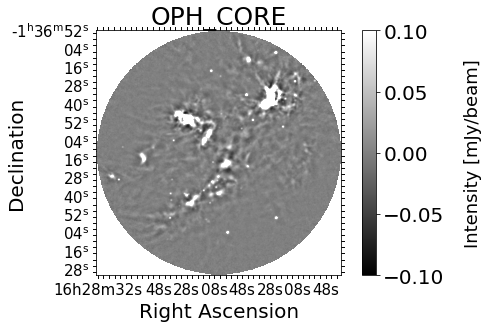

In [3]:
#Plotting the input fits file
#Adding axes to the figure by using gridspec structure
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,0.05])
gs.update(left=0.16, right=0.85, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
plt.rcParams['axes.titlesize'] = 25
axs = plt.subplot(gs[0,0], projection=wcs, facecolor='w')


#Plot info
lon = axs.coords[0]
lat = axs.coords[1]

lon.set_axislabel('Right Ascension', minpad=0.75, fontsize=20)
lat.set_axislabel('Declination', minpad=-0.3, fontsize=20)

lon.set_ticklabel(size=15, exclude_overlapping=True)
lat.set_ticklabel(size=15, exclude_overlapping=True)

lon.set_major_formatter('hh:mm:ss')
lon.set_separator(('h','m','s'))
lat.set_major_formatter('hh:mm:ss')

lon.set_ticks(spacing=60*u.arcsec)
lat.set_ticks(spacing=60*u.arcsec)

img = axs.imshow(image, cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gist_yarg colormap scheme


#Colorbar
cb_axs = plt.subplot(gs[0,1]) #Colorbar axes
cb = plt.colorbar(cax=cb_axs, mappable=img, orientation='vertical', ticklocation='right') #Colorbar
cb.ax.tick_params(labelsize=20)
cb.set_label('Intensity [mJy/beam]', fontsize=18, labelpad=20)

axs.set_title('OPH_CORE')

# plt.savefig('OPH_CORE_850_EA3_cal_smooth_coadd.png')

plt.show()

In [4]:
## Using numpy roll to shift pixels ##
## for x- and y-axis ##

h = 1 #1=3"

#axis = 1 = x-direction
xrollp = np.roll(image,h,axis=1) #x-direction roll, positive
xrolln = np.roll(image,-h,axis=1) #x-direction roll, negative
xdiff = xrollp - xrolln

yrollp = np.roll(image,h,axis=0) #x-direction roll, positive
yrolln = np.roll(image,-h,axis=0) #x-direction roll, negative
ydiff = yrollp - yrolln

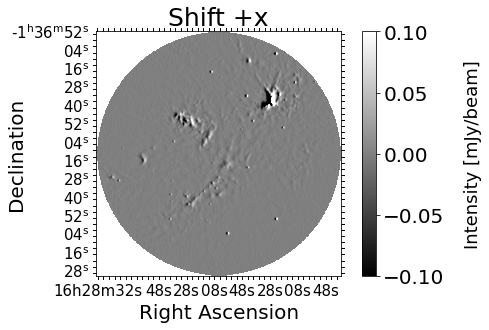

In [5]:
## Plotting df/dx ##
## Saving to a new FITS file ##

#Adding axes to the figure by using gridspec structure
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,0.05])
gs.update(left=0.16, right=0.85, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
plt.rcParams['axes.titlesize'] = 25
axs = plt.subplot(gs[0,0], projection=wcs, facecolor='w')


#Plot info
lon = axs.coords[0]
lat = axs.coords[1]

lon.set_axislabel('Right Ascension', minpad=0.75, fontsize=20)
lat.set_axislabel('Declination', minpad=-0.3, fontsize=20)

lon.set_ticklabel(size=15, exclude_overlapping=True)
lat.set_ticklabel(size=15, exclude_overlapping=True)

lon.set_major_formatter('hh:mm:ss')
lon.set_separator(('h','m','s'))
lat.set_major_formatter('hh:mm:ss')

lon.set_ticks(spacing=60*u.arcsec)
lat.set_ticks(spacing=60*u.arcsec)


ximg = axs.imshow(xdiff, cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gray colormap scheme

# #Smoothed
# ximg_sm = axs.imshow(xdiff/(2*h), cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gray colormap scheme


#Colorbar
cb_axs = plt.subplot(gs[0,1]) #Colorbar axes
cb = plt.colorbar(cax=cb_axs, mappable=ximg, orientation='vertical', ticklocation='right') #Colorbar

cb.ax.tick_params(labelsize=20)
cb.set_label('Intensity [mJy/beam]', fontsize=18, labelpad=20)

axs.set_title('Shift +x')

# hdu1 = fits.PrimaryHDU(xdiff) #Defining a new PrimaryHDU object to write to
# xdiff_filename = 'OPH_CORE_20160115_00084_850_EA3_cal_xdiff.FITS'
# hdu1.writeto(xdiff_filename) #Writing the df/dx info to hdu1

plt.show()

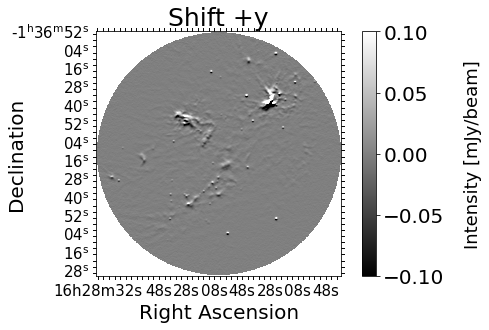

In [6]:
## Plotting df/dy ##
## Saving to a new FITS file ##

#Adding axes to the figure by using gridspec structure
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,0.05])
gs.update(left=0.16, right=0.85, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
plt.rcParams['axes.titlesize'] = 25
axs = plt.subplot(gs[0,0], projection=wcs, facecolor='w')


#Plot info
lon = axs.coords[0]
lat = axs.coords[1]

lon.set_axislabel('Right Ascension', minpad=0.75, fontsize=20)
lat.set_axislabel('Declination', minpad=-0.3, fontsize=20)

lon.set_ticklabel(size=15, exclude_overlapping=True)
lat.set_ticklabel(size=15, exclude_overlapping=True)

lon.set_major_formatter('hh:mm:ss')
lon.set_separator(('h','m','s'))
lat.set_major_formatter('hh:mm:ss')

lon.set_ticks(spacing=60*u.arcsec)
lat.set_ticks(spacing=60*u.arcsec)


yimg = axs.imshow(ydiff, cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gray colormap scheme

# #Smoothed
# yimg_sm = axs.imshow(ydiff/(2*h), cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gray colormap scheme


#Colorbar
cb_axs = plt.subplot(gs[0,1]) #Colorbar axes
cb = plt.colorbar(cax=cb_axs, mappable=yimg, orientation='vertical', ticklocation='right') #Colorbar

cb.ax.tick_params(labelsize=20)
cb.set_label('Intensity [mJy/beam]', fontsize=18, labelpad=20)

axs.set_title('Shift +y')

# hdu2 = fits.PrimaryHDU(ydiff) #Defining a new PrimaryHDU object to write to
# ydiff_filename = 'OPH_CORE_20160115_00084_850_EA3_cal_ydiff.FITS'
# hdu1.writeto(ydiff_filename) #Writing the df/dx info to hdu1

plt.show()

In [7]:
## Calculating df/dx, dy/dx, mag/angle of gradient, divergence ##

dfdx = xdiff/(2*h)
dfdy = ydiff/(2*h)

#Gradient
grad_mag = np.sqrt((dfdx)**2 + (dfdy)**2)
grad_theta = np.arctan((dfdy)/(dfdx))

#Divergence
divergx = (xrollp - 2*image + xrolln)/h
divergy = (yrollp - 2*image + yrolln)/h
diverg = divergx + divergy

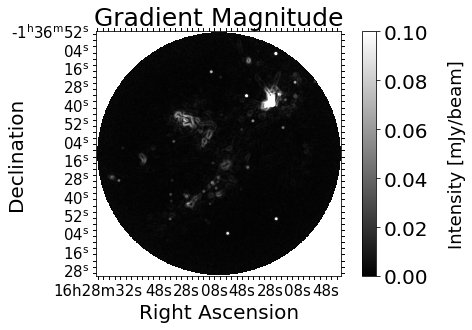

In [8]:
# Plotting grad_mag ##
# Different colorbar bounds!! ##

#Adding axes to the figure by using gridspec structure
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,0.05])
gs.update(left=0.16, right=0.85, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
plt.rcParams['axes.titlesize'] = 25
axs = plt.subplot(gs[0,0], projection=wcs, facecolor='w')


#Plot info
lon = axs.coords[0]
lat = axs.coords[1]

lon.set_axislabel('Right Ascension', minpad=0.75, fontsize=20)
lat.set_axislabel('Declination', minpad=-0.3, fontsize=20)

lon.set_ticklabel(size=15, exclude_overlapping=True)
lat.set_ticklabel(size=15, exclude_overlapping=True)

lon.set_major_formatter('hh:mm:ss')
lon.set_separator(('h','m','s'))
lat.set_major_formatter('hh:mm:ss')

lon.set_ticks(spacing=60*u.arcsec)
lat.set_ticks(spacing=60*u.arcsec)


gradimg = axs.imshow(grad_mag, cmap=plt.cm.gray, aspect='equal', vmin=0, vmax=0.1) #gray colormap scheme

#Colorbar
cb_axs = plt.subplot(gs[0,1]) #Colorbar axes
cb = plt.colorbar(cax=cb_axs, mappable=gradimg, orientation='vertical', ticklocation='right') #Colorbar

cb.ax.tick_params(labelsize=20)
cb.set_label('Intensity [mJy/beam]', fontsize=18, labelpad=20)

axs.set_title('Gradient Magnitude')

# hdu3 = fits.PrimaryHDU(grad_mag) #Defining a new PrimaryHDU object to write to
# grad_filename = 'OPH_CORE_20160115_00084_850_EA3_cal_gradient.FITS'
# hdu3.writeto(grad_filename) #Writing the df/dx info to hdu1

plt.show()

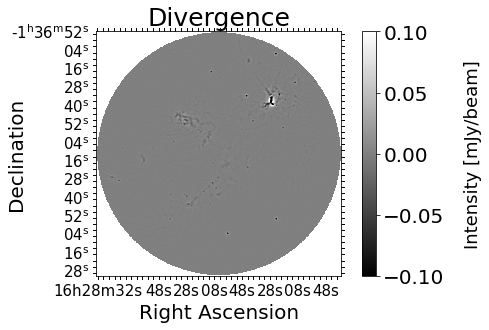

In [9]:
## Plotting the divergence ##
## Saving to a new FITS file ##

#Adding axes to the figure by using gridspec structure
gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,0.05])
gs.update(left=0.16, right=0.85, bottom=0.08, top=0.93, wspace=0.02, hspace=0.03)
plt.rcParams['axes.titlesize'] = 25
axs = plt.subplot(gs[0,0], projection=wcs, facecolor='w')


#Plot info
lon = axs.coords[0]
lat = axs.coords[1]

lon.set_axislabel('Right Ascension', minpad=0.75, fontsize=20)
lat.set_axislabel('Declination', minpad=-0.3, fontsize=20)

lon.set_ticklabel(size=15, exclude_overlapping=True)
lat.set_ticklabel(size=15, exclude_overlapping=True)

lon.set_major_formatter('hh:mm:ss')
lon.set_separator(('h','m','s'))
lat.set_major_formatter('hh:mm:ss')

lon.set_ticks(spacing=60*u.arcsec)
lat.set_ticks(spacing=60*u.arcsec)


divimg = axs.imshow(diverg, cmap=plt.cm.gray, aspect='equal', vmin=-0.1, vmax=0.1) #gray colormap scheme

#Colorbar
cb_axs = plt.subplot(gs[0,1]) #Colorbar axes
cb = plt.colorbar(cax=cb_axs, mappable=divimg, orientation='vertical', ticklocation='right') #Colorbar

cb.ax.tick_params(labelsize=20)
cb.set_label('Intensity [mJy/beam]', fontsize=18, labelpad=20)

axs.set_title('Divergence')

# hdu4 = fits.PrimaryHDU(diverg) #Defining a new PrimaryHDU object to write to
# diverg_filename = 'OPH_CORE_20160115_00084_850_EA3_cal_divergence.FITS'
# hdu4.writeto(diverg_filename) #Writing the df/dx info to hdu1

plt.show()

In [10]:
# ## Creating a cropped version of image ##

# trim = 200
# image1 = image[trim:-trim,trim:-trim]
# image1[image1 < 0.01] = 0 #Sets a threshold value for pixels, 0.05 = 50mJy
# # image1 = image1[::-1] #Vertically flips image1

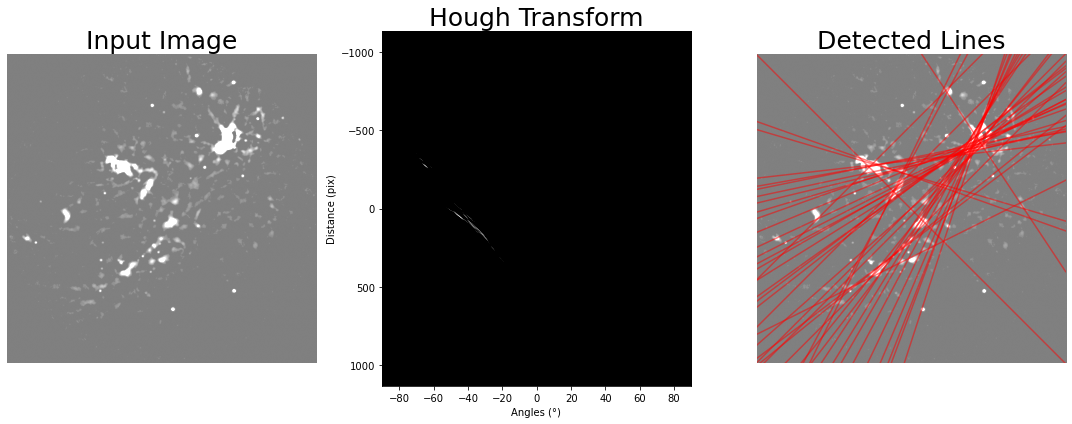

In [21]:
## Changing NaN to zeroes, sets threshold value ##
## Setting vmin, vmax, and threshold values for following HT plots ##

image[np.isnan(image)==True] = 0 #Instead of cropping the image
image1[np.isnan(image1)==True] = 0
image[image < 0.01] = 0 #Pixel threshold, 0.01 = 10mJy. Replaced with line below.

# image[image < 0.006] = 0 #Pixel threshold, 0.006 = 6mJy
# image1[image1 < 0.006] = 0
image1[image1 != 0] = 1 #Image disk

vmin = -0.1
vmax = 0.1

th = 225 #Threshold value used to find HT peaks

# print("Maximum pixel value: %.3f Jy" % np.nanmax(image)) #NOTE: Jy, not in Jy/beam
#nanmax excludes any nan values encountered!
#Should be approx. 4 Jy?


## Creating the linear Hough transform ##
## Plotting the original image, HT, and detected lines ##

#Precision of 0.5 degrees
tested_angles = np.linspace(-np.pi/2, np.pi/2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)
h1, theta1, d1 = hough_line(image1, theta=tested_angles)
#h = accumulator space

fig, axs = plt.subplots(1,3, figsize=(15,6))
ax = axs.ravel() #Flatten the array

ax[0].imshow(image, origin='lower', cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax[0].set_title('Input Image')
ax[0].set_axis_off() #No axes labels


#Creating the bounds
angle_step = 0.5*np.diff(theta).mean() #dtheta
d_step =0.5*np.diff(d).mean() #dx
#Creating the (left, right, top, bottom) bounds for the image to be just outside the d and theta arrays
bounds = [np.rad2deg(theta[0] - angle_step), #Subtracts dtheta from first index
          np.rad2deg(theta[-1] + angle_step), #Adds dtheta to last index
          d[-1] + d_step, d[0] - d_step] #Same for d

#Plotting the HT
# ax[1].imshow(np.log(1+h), extent=bounds, cmap=plt.cm.gray, aspect='auto')
ax[1].imshow(h, vmin=th, vmax=th+100, extent=bounds, cmap=plt.cm.gray, aspect='auto')
# ax[1].imshow(np.log(1+h), cmap=plt.cm.gray, aspect='auto') #aspect=float is height:width ratio value
ax[1].set_title('Hough Transform')
ax[1].set_xlabel('Angles (°)')
ax[1].set_ylabel('Distance (pix)')
# ax[1].axis('Image') #Sets axes to fit original data shape, don't want this!

ax[2].imshow(image, origin='lower', cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
# ax[2].set_ylim((image.shape[0],0))
ax[2].set_axis_off()
ax[2].set_title('Detected Lines')
trim = 0

theta_list = []
#Plotting the detected lines
for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=th)): #_ is a filler, we just want angle, dist
    (x0,y0) = dist*np.array([np.cos(angle), np.sin(angle)])

    theta_list.append(angle) #Appending angles found in image to a separate list

    # if (angle > -np.pi/3) and (angle < -np.pi/12):
    ax[2].axline((x0,y0), slope=np.tan(angle+np.pi/2), alpha=0.5, color='r')
    ax[2].set_ylim((0,len(image)-trim*2))
    ax[2].set_xlim((0,len(image)-trim*2))


plt.tight_layout()

# plt.savefig('Input_HT_Detected.png')
plt.show()

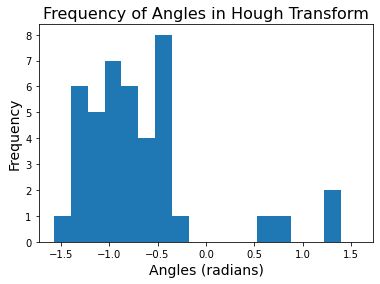

Bins for angles (in degrees):
[-90. -80. -70. -60. -50. -40. -30. -20. -10.   0.  10.  20.  30.  40.
  50.  60.  70.  80.  90.]

Frequency of values in bins_theta:
[1. 6. 5. 7. 6. 4. 8. 1. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0.]
Maximum number of lines detected at angles between -30.00° and -20.00° 


In [22]:
## Histogram of 'h' values from HT ##

# plt.hist(h.ravel(), range=(th,400))


## Creating a Histogram Plot of the HT Angles ##

# base = abs(theta[0]) #Not a good distribution, maybe fix bins_theta?
# base = 1.2
# bins_theta = [(base**(i)-2.5) for i in range(10)] #Exponential bins
bins_theta = np.linspace(-np.pi/2,np.pi/2,19) #Linear bins
# (n,bins,patches) = plt.hist(theta_list, bins=bins_theta)
(n,bins,patches) = plt.hist(theta_list, bins_theta)

# plt.xlim((-1.5,1.5))
# plt.xlim((-2,2))
plt.title('Frequency of Angles in Hough Transform', fontsize=16)
plt.xlabel('Angles (radians)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

print("Bins for angles (in degrees):")
print(np.multiply(bins_theta,(180/(np.pi))))
# print()
# print("Bins for angles:")
# print(bins_theta)
print()
print("Frequency of values in bins_theta:")
print(n)



## Finding the range where the maximum number of lines are detected ##

theta_max_ind = np.argmax(n) #Finds the index of the highest-frequency bin
print("Maximum number of lines detected at angles between %.2f° and %.2f° "  % (bins_theta[theta_max_ind]*(180/(np.pi)),bins_theta[theta_max_ind+1]*(180/(np.pi))) )
# print("Maximum number of lines detected at angles between %.2f and %.2f radians "  % (bins_theta[theta_max_ind],bins_theta[theta_max_ind+1]))

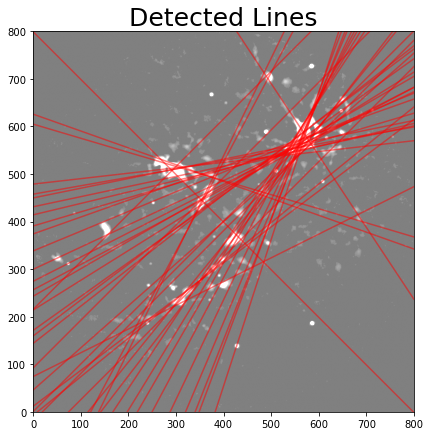

In [23]:
## Plotting just the detected lines image ##

plt.figure(figsize=(7,7))
plt.imshow(image, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
plt.ylim((image.shape[0],0))
# ax[2].set_axis_off()
plt.title('Detected Lines')

#Plotting the detected lines
for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=th)): #_ is a filler, we just want angle, dist
    (x0,y0) = dist*np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0,y0), slope=np.tan(angle+np.pi/2), alpha=0.5, color='r')
    plt.ylim((0,len(image)-trim*2))
    plt.xlim((0,len(image)-trim*2))

plt.show()

In [24]:
## Creating a variable to display accumulator space for different angles of the Hough Transform ##

num_sums = 18
# x_sum = np.zeros(num_sums)
x_sum = [[] for i in range(num_sums)]
x_sum1 = [[] for i in range(num_sums)]
for i in range(num_sums):
    x_sum[i] = np.sum(h[:, i*20:i*20+19], axis=1)/20  # Grabs all from accumulator for 10-degree increments
    x_sum1[i] = np.sum(h1[:, i*20:i*20+19], axis=1)/20
#Normalized by 20 = 10 degrees, since each integer is half a degree (see 'tested_angles')
#x_sum takes the sum of all the distances (and normalizes by 10 degrees) so the distances are all the same for that 10 degree increment

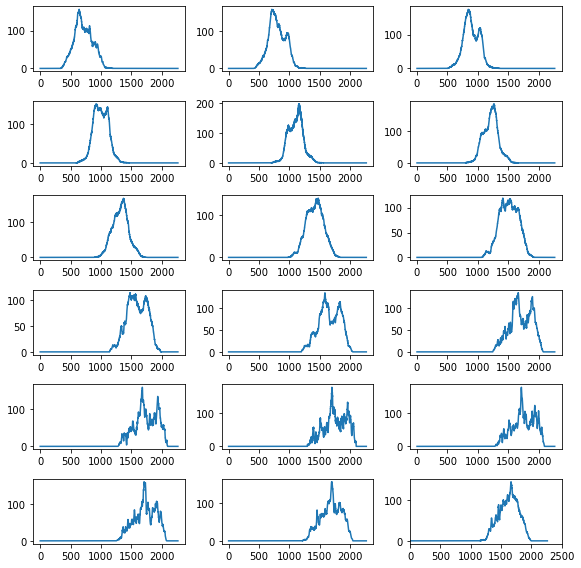

In [25]:
## Creating a 3x6 plot for all frames ##

rows = 6
cols = 3
fig, axs = plt.subplots(rows,cols,figsize=(8,8))

index = []
for i in range(rows):
    for j in range(cols):
        index.append((i,j)) #For plotting in [row,col]

for i in range(num_sums):
    axs[index[i]].plot(x_sum[i])

plt.xlim((0,2500))
plt.tight_layout() #Prevents overlap
plt.show()